In [6]:
from openpyxl import Workbook, load_workbook
import pandas as pd
import gran
from gran import tqdm

In [7]:
annot1_path = gran.get_resource_path("deep_annot", "annotationFormat_yongfu.xlsx")
annot2_path = gran.get_resource_path("deep_annot", "annotationFormat_joy.xlsx")

In [8]:
annot1_path.exists()

True

In [9]:
annot1_sn = pd.ExcelFile(annot1_path).sheet_names
print(annot1_sn)

['Sheet1', 'Sheet2', 'Sheet3', 'joy']


In [13]:
annot1 = pd.read_excel(annot1_path, sheet_name=annot1_sn[0])
annot2 = pd.read_excel(annot1_path, sheet_name=annot1_sn[1])
annot3 = pd.read_excel(annot1_path, sheet_name=annot1_sn[2])
annot4 = pd.read_excel(annot1_path, sheet_name=annot1_sn[3])

In [14]:
def standardize_frame(annot_x):
    concat_cols = ["idx", "annotator", "lexical_unit", "context", 
                 "full_text", "form", "function_coarse", "function_fine"]
    annot_x = annot_x[concat_cols]
    annot_x = annot_x.loc[annot_x.lexical_unit.map(lambda x: not pd.isna(x)),:]
    annot_new = annot_x.copy()
    return annot_new

In [15]:
annot_frames = pd.concat([standardize_frame(annot1), standardize_frame(annot2), 
                          standardize_frame(annot3), standardize_frame(annot4)])                          
annot_frames.reset_index(inplace=True)

In [16]:
annot_frames.form.value_counts()

3.2    272
3.1     79
2.1     54
2.2     54
Name: form, dtype: int64

In [17]:
annot_frames.lexical_unit.values

array(['A餐', '鳳梨酥', '台灣茶', '滿嘴', '粒粒分明', '有誠意', '無負擔', '也有30幾年了', '外國進口',
       '新鮮製作', '主打', '鹹甜鹹甜', '豎起大拇哥', '不打折扣', '平價', '現點現做', '香而不油', '銅板價',
       '七里香', '最對味', '入口', '填補一下飢餓的肚子', '朝盛地點', '佛心來著', '有名氣', '真的不簡單',
       '別的不說', '一來', '二來', '沒什麼抵抗力', '很可以', '鎖在裡面', '在味蕾上跳舞', '第一個',
       '想怎樣', '有沒有這麼幸運', '真的要昏倒了', '做功課', '咖啡拉花', '一口接一口', '一整個就', '百年',
       '到爆炸', '當然是沒話說', '不囉嗦', '想哭', 'CP值', '收掉了', '一拖拉庫', '想殺人',
       '牢牢地抓住我的胃', '壓軸', '那種很小氣', '不能抗拒', '沒讓我失望', '親民的價格', '同場加映', '銷魂',
       '人氣依舊紅不讓', '無肉不歡', '卡滋', '打牙祭', '不知哪根筋不對', '差點下巴掉下來', '超酷的', ':P',
       '順口', '好讚', '超優', '真的超完美', '外國的月亮真的是圓', '捧著肚子 ', '馬虎', ':)', '十足 ',
       '當然要', '超人氣', '到底有多厲害', '入口即化', '別具一番滋味', '念念不忘', '見識見識', 'XD',
       '一整個', '~~', '有沒有很', '太讚啦', '這就是', '喔~', '港式燒臘', '道地', '戰區', '吃口碑',
       '堵住同事們的嘴', '超愛', '好吃', '一分錢一分貨', '一般般', '物超所值', '很是不錯', '是不是口水直流',
       '樣樣都是', '夜貓子', '立馬', '翻桌率', '來看看', '傻眼', '打屁', '還真不少', '也很不錯',
       '好滿足', '真的很棒', '一口接著一口', '提不起勁', '鹹粥', '九層塔', '經過一番

In [18]:
gran.install_data_cache("deep_annot")
annot_path = gran.get_cache_path("deep_annot", "annotations.csv")
annot_frames.to_csv(annot_path)

In [55]:
ug_path = gran.get_cache_path('lang_model', 'uni_grams.pkl')
bg_path = gran.get_cache_path('lang_model', 'bi_grams.pkl')
tg_path = gran.get_cache_path('lang_model', 'tri_grams.pkl')
qg_path = gran.get_cache_path('lang_model', 'quad_grams.pkl')
pg_path = gran.get_cache_path('lang_model', 'penta_grams.pkl')

In [56]:
ug_path.exists()

True

In [59]:
import requests
from bs4 import BeautifulSoup
import re

def find_links(category):
    atags = ngrams_dom.find_all("a", {
        'href': re.compile(f'googlebooks-chi-sim-all-{category}-2012')})
    links = [x.get('href') for x in atags]
    links = [x for x in links if x]
    return links

ngrams_index_url = "http://storage.googleapis.com/books/ngrams/books/datasetsv2.html"
ngrams_index = requests.get(ngrams_index_url)
ngrams_dom = BeautifulSoup(ngrams_index.text)
tc_links = find_links('totalcounts')
tc_data = requests.get(tc_links[0]).text

In [89]:
total_counts = pd.DataFrame(map(int, x.split(",")) for x in tc_data.strip().split("\t"))

In [90]:
total_counts.columns = ["year", "match_count", "page_count", "volume_count"]

In [92]:
ng_N = total_counts.match_count.sum()

In [103]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [93]:
with open(pg_path, "rb") as fin:
    pg = pickle.load(fin)

In [106]:
with open(ug_path, "rb") as fin:
    ug = pickle.load(fin)[0]

In [115]:
ng_1 = next(iter(pg.items()))

$$
pmi(x_1, \ldots x_n) = [\log f(x_1, \ldots x_n) - log N] - \left[ \sum^N_{i=1} log f(x_i) - log N\right]
$$

see 3.2 in Van de Cruys (2011) [pdf](http://www.timvandecruys.be/media/papers/VandeCruys2011Two.pdf)

In [165]:
def compute_pmi(ng, ng_freq, ug, ngN):
    toks = ng.split("|")
    logFreq_nom = np.log(ng_freq)
    logFreq_denom = 0
    logngN = np.log(ngN)    
    for tok_x in toks:
        try:
            logFreq_nom += np.log(ug[tok_x])        
        except KeyError:
            return float("-inf")
    pmi = (logFreq_nom - logFreq_denom) + logngN * (len(ng)-1)    
    return pmi

In [168]:
def generate_pmi(ng_data):
    ng_pmi = {}
    for ng_x, ng_freq in tqdm(ng_data.items()):
        ng_pmi[ng_x] = compute_pmi(ng_x, ng_freq, ug, ng_N)
    return ng_pmi

In [ ]:
def export_ng_pmi(ng_pmi, sorted_ng, fname, cutN):
    ng_pmi_path = gran.get_cache_path("pmi_data", fname)    
    ng_pmi_saved = {ng: ng_pmi[ng] for ng in sorted_ng[:cutN]}
    with open(ng_pmi_path, "wb") as fout:
        pickle.dump(ng_pmi_saved, fout)

## Penta-gram

In [169]:
pg_pmi = generate_pmi(pg)   

In [171]:
sorted_pg = sorted(pg_pmi.keys(), key=pg_pmi.get)
sorted_pmi = sorted(pg_pmi.values(), reverse=True)

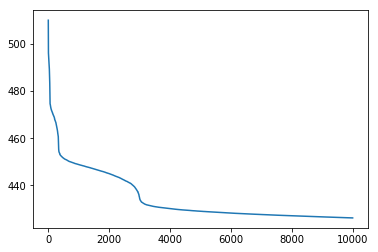

In [173]:
plt.plot(sorted_pmi[:3000])

In [177]:
gran.install_data_cache("pmi_data")

In [179]:
export_ng_pmi(pg_pmi, sorted_pg, "pg_pmi.pkl", 3000)

In [181]:
del pg_pmi, sorted_pg, pg

## Quadgram

In [182]:
with open(qg_path, "rb") as fin:
    qg = pickle.load(fin)
qg_pmi = generate_pmi(qg)

In [183]:
sorted_qg = sorted(qg_pmi.keys(), key=qg_pmi.get)
sorted_pmi = sorted(qg_pmi.values(), reverse=True)

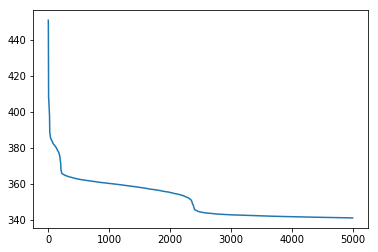

In [189]:
plt.plot(sorted_pmi[:5000])

In [190]:
export_ng_pmi(qg_pmi, sorted_qg, "qg_pmi.pkl", 2500)

In [191]:
del qg_pmi, sorted_qg, qg

## Trigram

In [192]:
with open(tg_path, "rb") as fin:
    tg = pickle.load(fin)
tg_pmi = generate_pmi(tg)
sorted_tg = sorted(tg_pmi.keys(), key=tg_pmi.get)
sorted_pmi = sorted(tg_pmi.values(), reverse=True)

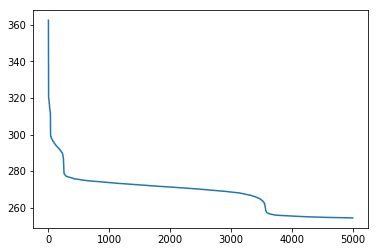

In [193]:
plt.plot(sorted_pmi[:5000])

In [194]:
export_ng_pmi(tg_pmi, sorted_tg, "tg_pmi.pkl",3500)

In [195]:
del tg_pmi, sorted_tg, tg

## Bigram

In [197]:
with open(bg_path, "rb") as fin:
    bg = pickle.load(fin)[0]
bg_pmi = generate_pmi(bg)
sorted_bg = sorted(bg_pmi.keys(), key=bg_pmi.get)
sorted_pmi = sorted(bg_pmi.values(), reverse=True)

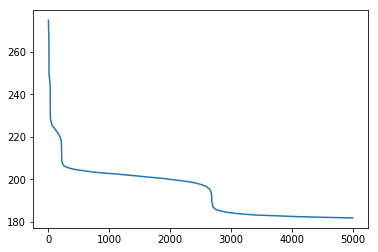

In [199]:
plt.plot(sorted_pmi[:5000])

In [200]:
export_ng_pmi(bg_pmi, sorted_bg, "bg_pmi.pkl", 2800)

In [201]:
del bg_pmi, sorted_bg, bg